# Analysis of Electoral Performance in Municipal Elections in the Metropolitan Region of Recife between 2008 and 2020

## Candidate x Party

## Environment Settings

In [19]:
# Imports
import pandas as pd;
import matplotlib.pyplot as plt;

In [20]:
# Config PySpark
import os
import sys
from pyspark.sql import SparkSession

os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable
spark = SparkSession.builder.getOrCreate()

In [83]:
from pyspark.sql.functions import count, col, sum, lit, desc
from pyspark.sql import functions as F

In [22]:
# Creating a SparkSession
spark = SparkSession.builder.appName("LoadElectionData").getOrCreate();

## Datasets

Datasets Used:
* 
* 
* 
* 

In [23]:
df_cand_08 = spark.read.csv('../datasets/votacao_candidato_munzona_2008_PE.csv', encoding='latin1', sep=';', header=True, inferSchema=True);
df_cand_12 = spark.read.csv('../datasets/votacao_candidato_munzona_2012_PE.csv', encoding='latin1', sep=';', header=True, inferSchema=True);
df_cand_16 = spark.read.csv('../datasets/votacao_candidato_munzona_2016_PE.csv', encoding='latin1', sep=';', header=True, inferSchema=True);
df_cand_20 = spark.read.csv('../datasets/votacao_candidato_munzona_2020_PE.csv', encoding='latin1', sep=';', header=True, inferSchema=True);

In [24]:
df_cand_08.show(5)

+----------+-------------------+-----------+---------------+-----------------+--------+----------+-------------+----------+--------------+-----+-----+------------+------------+------------+-------+--------+--------+------------+------------+--------------------+-------------------+-------------------+-----------------------+-----------------------+------------------------+------------------------+-------------+----------+----------+--------------------+------------+--------------------+-----------------------+----------------+----------------+-------------------+-----------------+
|DT_GERACAO|         HH_GERACAO|ANO_ELEICAO|CD_TIPO_ELEICAO|  NM_TIPO_ELEICAO|NR_TURNO|CD_ELEICAO|   DS_ELEICAO|DT_ELEICAO|TP_ABRANGENCIA|SG_UF|SG_UE|       NM_UE|CD_MUNICIPIO|NM_MUNICIPIO|NR_ZONA|CD_CARGO|DS_CARGO|SQ_CANDIDATO|NR_CANDIDATO|        NM_CANDIDATO|  NM_URNA_CANDIDATO|NM_SOCIAL_CANDIDATO|CD_SITUACAO_CANDIDATURA|DS_SITUACAO_CANDIDATURA|CD_DETALHE_SITUACAO_CAND|DS_DETALHE_SITUACAO_CAND|TP_AGREMIACA

In [25]:
df_cand_12.show(5)

+----------+-------------------+-----------+---------------+-----------------+--------+----------+--------------------+----------+--------------+-----+-----+------------+------------+------------+-------+--------+--------+------------+------------+--------------------+-----------------+-------------------+-----------------------+-----------------------+------------------------+------------------------+-------------+----------+----------+--------------------+------------+--------------------+-----------------------+----------------+----------------+-------------------+-----------------+
|DT_GERACAO|         HH_GERACAO|ANO_ELEICAO|CD_TIPO_ELEICAO|  NM_TIPO_ELEICAO|NR_TURNO|CD_ELEICAO|          DS_ELEICAO|DT_ELEICAO|TP_ABRANGENCIA|SG_UF|SG_UE|       NM_UE|CD_MUNICIPIO|NM_MUNICIPIO|NR_ZONA|CD_CARGO|DS_CARGO|SQ_CANDIDATO|NR_CANDIDATO|        NM_CANDIDATO|NM_URNA_CANDIDATO|NM_SOCIAL_CANDIDATO|CD_SITUACAO_CANDIDATURA|DS_SITUACAO_CANDIDATURA|CD_DETALHE_SITUACAO_CAND|DS_DETALHE_SITUACAO_CAND|TP

In [26]:
df_cand_16.show(5)

+----------+-------------------+-----------+---------------+-----------------+--------+----------+--------------------+----------+--------------+-----+-----+------------+------------+------------+-------+--------+--------+------------+------------+--------------------+-------------------+-------------------+-----------------------+-----------------------+------------------------+------------------------+-------------+----------+----------+--------------------+------------+--------------------+-----------------------+----------------+----------------+-------------------+-----------------+
|DT_GERACAO|         HH_GERACAO|ANO_ELEICAO|CD_TIPO_ELEICAO|  NM_TIPO_ELEICAO|NR_TURNO|CD_ELEICAO|          DS_ELEICAO|DT_ELEICAO|TP_ABRANGENCIA|SG_UF|SG_UE|       NM_UE|CD_MUNICIPIO|NM_MUNICIPIO|NR_ZONA|CD_CARGO|DS_CARGO|SQ_CANDIDATO|NR_CANDIDATO|        NM_CANDIDATO|  NM_URNA_CANDIDATO|NM_SOCIAL_CANDIDATO|CD_SITUACAO_CANDIDATURA|DS_SITUACAO_CANDIDATURA|CD_DETALHE_SITUACAO_CAND|DS_DETALHE_SITUACAO_CAN

In [27]:
df_cand_20.show(5)

+----------+-------------------+-----------+---------------+-----------------+--------+----------+--------------------+----------+--------------+-----+-----+--------+------------+------------+-------+--------+--------+------------+------------+--------------------+-------------------+-------------------+-----------------------+-----------------------+------------------------+------------------------+---------------+----------+----------+--------------------+------------+------------+------------+-----------------------+------------+---------------+-----------------------+-------------------+-----------------+------------------------+-------------------------+----------------+----------------+
|DT_GERACAO|         HH_GERACAO|ANO_ELEICAO|CD_TIPO_ELEICAO|  NM_TIPO_ELEICAO|NR_TURNO|CD_ELEICAO|          DS_ELEICAO|DT_ELEICAO|TP_ABRANGENCIA|SG_UF|SG_UE|   NM_UE|CD_MUNICIPIO|NM_MUNICIPIO|NR_ZONA|CD_CARGO|DS_CARGO|SQ_CANDIDATO|NR_CANDIDATO|        NM_CANDIDATO|  NM_URNA_CANDIDATO|NM_SOCIAL_CAN

## Data Transformation

In [28]:
# GROUP only CD_MUNICIPIO and NM_MUNICIPIO
df_grouped = df_cand_20.groupBy("CD_MUNICIPIO", "NM_MUNICIPIO").agg(count("*").alias("count"))

# ORDER by NM_MUNICIPIO
df_sorted = df_grouped.orderBy("NM_MUNICIPIO")

# SHOW all
df_sorted.show(df_sorted.count())

+------------+--------------------+-----+
|CD_MUNICIPIO|        NM_MUNICIPIO|count|
+------------+--------------------+-----+
|       26310|        ABREU E LIMA|  243|
|       23019|AFOGADOS DA INGAZ...|  100|
|       23035|             AFRÂNIO|   43|
|       23051|           AGRESTINA|   68|
|       23116|           ALAGOINHA|   40|
|       23132|             ALIANÇA|   79|
|       23159|             ALTINHO|   64|
|       23175|             AMARAJI|   83|
|       23191|             ANGELIM|   44|
|       23213|           ARARIPINA|  110|
|       23205|           ARAÇOIABA|  107|
|       23230|           ARCOVERDE|  144|
|       23256|  BARRA DE GUABIRABA|   29|
|       23272|           BARREIROS|  144|
|       23337|         BELO JARDIM|  179|
|       23299|      BELÉM DE MARIA|   55|
|       23310|BELÉM DO SÃO FRAN...|   65|
|       23353|             BETÂNIA|   44|
|       23370|            BEZERROS|  142|
|       23396|              BODOCÓ|   55|
|       23418|        BOM CONSELHO

In [29]:
# Região Metropolitana do Recife

rmr = ['ABREU E LIMA', 'ARAÇOIABA', 'CABO DE SANTO AGOSTINHO', 'CAMARAGIBE', 'IGARASSU',
 'ILHA DE ITAMARACÁ', 'IPOJUCA', 'ITAPISSUMA', 'JABOATÃO DOS GUARARAPES', 'MORENO',
 'OLINDA', 'PAULISTA', 'RECIFE', 'SÃO LOURENÇO DA MATA'];

rmr_cd = [26310, 23205, 23574, 26298, 24350,
 24511, 24430, 26336, 24570, 24872,
 24910, 25135, 25313, 25739];

In [30]:
# Selecting only from RMR
df_rmr_08 = df_cand_08.filter(df_cand_08["CD_MUNICIPIO"].isin(rmr_cd))
df_rmr_12 = df_cand_12.filter(df_cand_12["CD_MUNICIPIO"].isin(rmr_cd))
df_rmr_16 = df_cand_16.filter(df_cand_16["CD_MUNICIPIO"].isin(rmr_cd))
df_rmr_20 = df_cand_20.filter(df_cand_20["CD_MUNICIPIO"].isin(rmr_cd))

In [31]:
# Selecting only Vereador by DS_CARGO
RMR_VER_08 = df_rmr_08.filter(col("DS_CARGO").contains("Vereador"))
RMR_VER_12 = df_rmr_12.filter(col("DS_CARGO").contains("Vereador"))
RMR_VER_16 = df_rmr_16.filter(col("DS_CARGO").contains("Vereador"))
RMR_VER_20 = df_rmr_20.filter(col("DS_CARGO").contains("Vereador"))

In [32]:
# Selecting only Prefeito by DS_CARGO
RMR_PREF_08 = df_rmr_08.filter(col("DS_CARGO").contains("Prefeito"))
RMR_PREF_12 = df_rmr_12.filter(col("DS_CARGO").contains("Prefeito"))
RMR_PREF_16 = df_rmr_16.filter(col("DS_CARGO").contains("Prefeito"))
RMR_PREF_20 = df_rmr_20.filter(col("DS_CARGO").contains("Prefeito"))

In [33]:
# Distinguish by turn

# First round
RMR_PREF_08_t1 = RMR_PREF_08.filter(col("NR_TURNO").contains(1))
RMR_PREF_12_t1 = RMR_PREF_12.filter(col("NR_TURNO").contains(1))
RMR_PREF_16_t1 = RMR_PREF_16.filter(col("NR_TURNO").contains(1))
RMR_PREF_20_t1 = RMR_PREF_20.filter(col("NR_TURNO").contains(1))

# Second round
RMR_PREF_08_t2 = RMR_PREF_08.filter(col("NR_TURNO").contains(2))
RMR_PREF_12_t2 = RMR_PREF_12.filter(col("NR_TURNO").contains(2))
RMR_PREF_16_t2 = RMR_PREF_16.filter(col("NR_TURNO").contains(2))
RMR_PREF_20_t2 = RMR_PREF_20.filter(col("NR_TURNO").contains(2))

## Analytics

### RMR

In [90]:
# df_cand_20     df_rmr_20

df_pref = df_cand_20.filter(col("DS_CARGO").contains("Prefeito"))
df_pref_t1 = df_pref.filter(col("NR_TURNO").contains(1))

df_pref_mun = df_pref_t1.groupBy("NM_MUNICIPIO", "CD_MUNICIPIO").agg(sum("QT_VOTOS_NOMINAIS").alias("total_votos"))
df_pref_mun = df_pref_mun.orderBy(F.desc("total_votos"))

total_votos_total = df_pref_mun.agg(sum("total_votos")).collect()[0][0]

df_porcentagem = df_pref_mun.withColumn("PORCENTAGEM", col("total_votos") / total_votos_total * 100)

# Ordenar os resultados pela coluna NM_MUNICIPIO
df_porcentagem = df_porcentagem.orderBy(desc("PORCENTAGEM"))

df_porcentagem.show()

+--------------------+------------+-----------+------------------+
|        NM_MUNICIPIO|CD_MUNICIPIO|total_votos|       PORCENTAGEM|
+--------------------+------------+-----------+------------------+
|              RECIFE|       25313|     798791|  16.4102586226732|
|JABOATÃO DOS GUAR...|       24570|     266391|5.4727021270301455|
|              OLINDA|       24910|     194074| 3.987031065618765|
|             CARUARU|       23817|     171213|3.5173776489266237|
|           PETROLINA|       25216|     159208|3.2707484871493984|
|            PAULISTA|       25135|     146782| 3.015470356017053|
|CABO DE SANTO AGO...|       23574|     114180| 2.345699099685432|
|          CAMARAGIBE|       26298|      78913|1.6211784292649898|
|VITÓRIA DE SANTO ...|       26271|      73369|1.5072832128640785|
|           GARANHUNS|       24198|      64550| 1.326106821551013|
|             IPOJUCA|       24430|      62629|1.2866420468926163|
|        ABREU E LIMA|       26310|      59816|1.2288521400138

In [93]:
df_porcent_rmr = df_porcentagem.filter(df_porcentagem["CD_MUNICIPIO"].isin(rmr_cd))

# Convert to Pandas DATAFRAMES
df_porcent_rmr_pd = df_porcent_rmr.toPandas()

df_porcent_rmr_pd['NM_MUNICIPIO'] = df_porcent_rmr_pd['NM_MUNICIPIO'].str.capitalize()

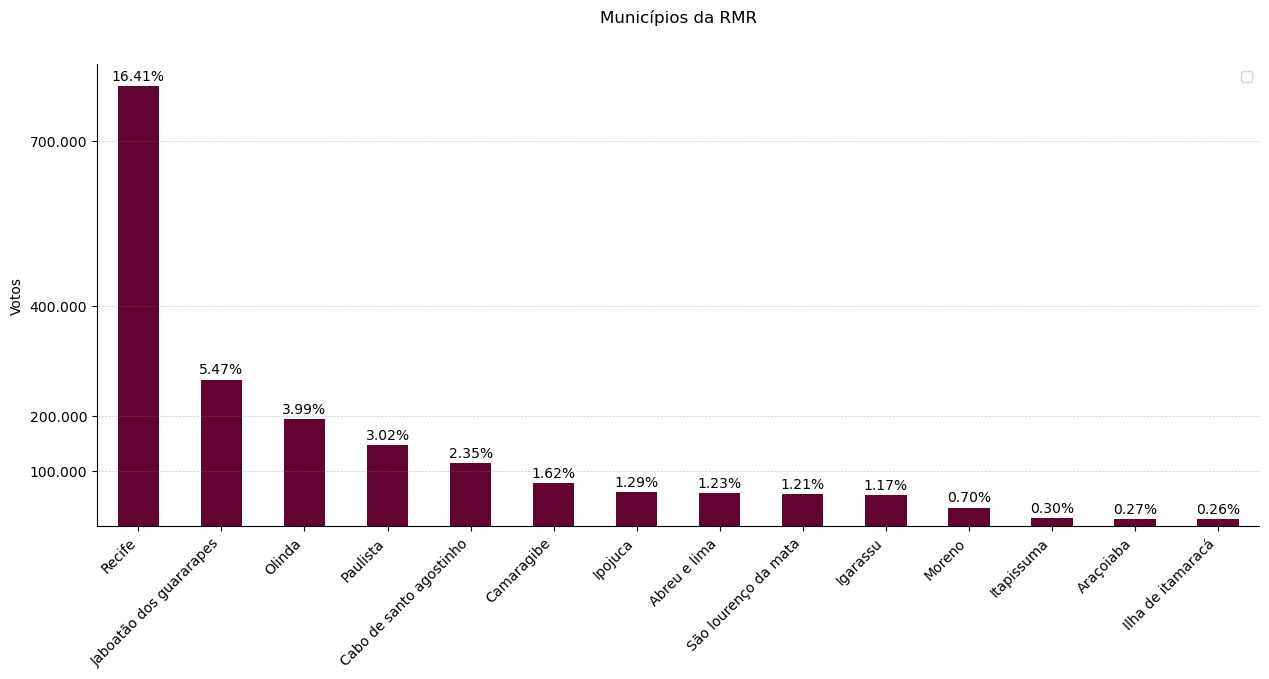

In [94]:
ax = df_porcent_rmr_pd.plot(x='NM_MUNICIPIO', y='total_votos', kind='bar', figsize=(15, 6), color='#630330')

plt.xlabel('')
plt.ylabel('Votos')
plt.title('Municípios da RMR sobre o total de votos em PE', pad=30)
plt.xticks(rotation=45, ha='right')
plt.yticks([100000, 200000, 400000, 700000], ['100.000', '200.000', '400.000', '700.000'])
plt.legend(labels=[])

for valor in [100000, 200000, 400000, 700000]:
    plt.axhline(y=valor, color='gray', linestyle='--', linewidth=0.5, alpha=0.4)

# Adicionar porcentagens no topo de cada barra
for i, barra in enumerate(ax.patches):
    altura = barra.get_height()
    porcentagem = df_porcent_rmr_pd.loc[i, 'PORCENTAGEM']
    ax.text(barra.get_x() + barra.get_width() / 2, altura + 10000, f'{porcentagem:.2f}%', ha='center')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

### Desempenho Partidário para Eleições de Vereador entre 2008 e 2020

In [34]:
# 2008: SG_PARTIDO, QT_VOTOS_NOMINAIS, NM_CANDIDATO, NM_URNA_CANDIDATO
# 2012: SG_PARTIDO, QT_VOTOS_NOMINAIS, NM_CANDIDATO, NM_URNA_CANDIDATO
# 2016: SG_PARTIDO, QT_VOTOS_NOMINAIS, NM_CANDIDATO, NM_URNA_CANDIDATO
# 2020: SG_PARTIDO, QT_VOTOS_NOMINAIS, NM_CANDIDATO, NM_URNA_CANDIDATO

In [44]:
# GROUB BY parties
RMR_VER_08_grouped = RMR_VER_08.groupBy("SG_PARTIDO").agg(sum("QT_VOTOS_NOMINAIS").alias("total_votos"))
RMR_VER_08_sorted = RMR_VER_08_grouped.orderBy(F.desc("total_votos"))
RMR_VER_08_sorted = RMR_VER_08_sorted.withColumn("ANO", lit(2008))

RMR_VER_12_grouped = RMR_VER_12.groupBy("SG_PARTIDO").agg(sum("QT_VOTOS_NOMINAIS").alias("total_votos"))
RMR_VER_12_sorted = RMR_VER_12_grouped.orderBy(F.desc("total_votos"))
RMR_VER_12_sorted = RMR_VER_12_sorted.withColumn("ANO", lit(2012))

RMR_VER_16_grouped = RMR_VER_16.groupBy("SG_PARTIDO").agg(sum("QT_VOTOS_NOMINAIS").alias("total_votos"))
RMR_VER_16_sorted = RMR_VER_16_grouped.orderBy(F.desc("total_votos"))
RMR_VER_16_sorted = RMR_VER_16_sorted.withColumn("ANO", lit(2016))

RMR_VER_20_grouped = RMR_VER_20.groupBy("SG_PARTIDO").agg(sum("QT_VOTOS_NOMINAIS").alias("total_votos"))
RMR_VER_20_sorted = RMR_VER_20_grouped.orderBy(F.desc("total_votos"))
RMR_VER_20_sorted = RMR_VER_20_sorted.withColumn("ANO", lit(2020))


In [42]:
RMR_VER_08_sorted.show()

+----------+-----------+----+
|SG_PARTIDO|total_votos| ANO|
+----------+-----------+----+
|        PT|     149442|2008|
|       PTB|     147869|2008|
|   PC do B|     131974|2008|
|       PHS|     118983|2008|
|       PSB|     115132|2008|
|       PMN|      97423|2008|
|       PDT|      90176|2008|
|       PSL|      80810|2008|
|      PMDB|      78343|2008|
|       DEM|      70646|2008|
|        PV|      69713|2008|
|      PSDB|      65994|2008|
|       PTN|      65948|2008|
|       PTC|      62388|2008|
|       PRP|      61062|2008|
|      PSDC|      60592|2008|
|       PPS|      59506|2008|
|   PT do B|      59291|2008|
|        PP|      45897|2008|
|       PSC|      43082|2008|
+----------+-----------+----+
only showing top 20 rows



In [46]:
RMR_VER_all_sorted = RMR_VER_08_sorted.union(RMR_VER_12_sorted).union(RMR_VER_16_sorted).union(RMR_VER_20_sorted)

In [47]:
# Convert to Pandas DATAFRAMES
RMR_VER_all_sorted_pd = RMR_VER_all_sorted.toPandas()

In [57]:
RMR_VER_all_sorted_pd.sort_values(by='total_votos', ascending=False).head(20)

,SG_PARTIDO,total_votos,ANO
89,PSB,281853,2020
55,PSB,209580,2016
27,PSB,182034,2012
0,PT,149442,2008
1,PTB,147869,2008
28,PT,139627,2012
2,PC do B,131974,2008
29,PTC,124179,2012
30,PC do B,121639,2012
3,PHS,118983,2008


In [69]:
SELECTED_PARTIES = ["PT", "PTB", "PSB", "PL", "PC do B", "PHS", "PSL", "PSC", "PP"]

DF_some_parties = RMR_VER_all_sorted_pd[RMR_VER_all_sorted_pd['SG_PARTIDO'].isin(SELECTED_PARTIES)]


In [67]:
COLORS_by_PARTIES = {
    "PT": "red",
    "PSB": "orange",
    "PTB": "green",
    "PL": "blue",
    "PC do B": "darkred",
    "PSL": "dodgerblue",
    "PSC": "skyblue",
    "PP": "saddlebrown",
    "PHS": "cyan"
}

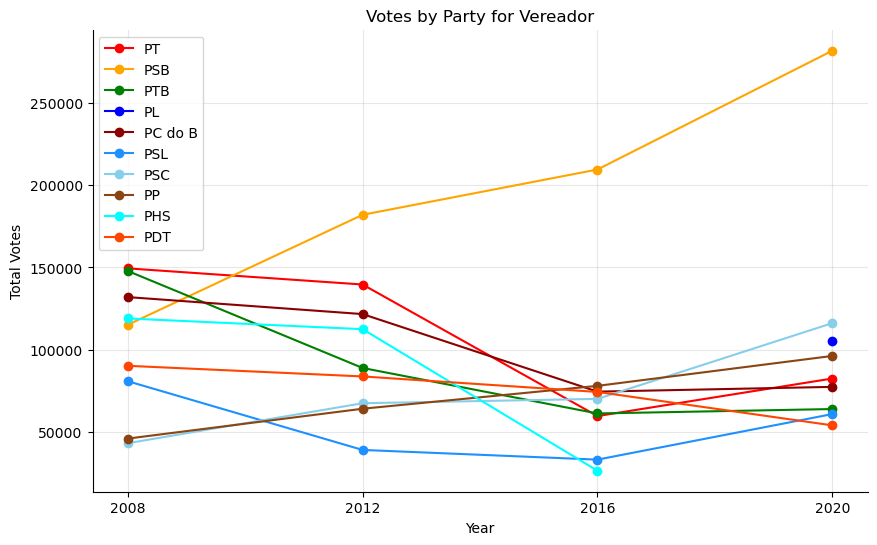

In [73]:

plt.figure(figsize=(10, 6))

for party, color in COLORS_by_PARTIES.items():
    # Filtrar os dados apenas para o partido atual
    data_partido = DF_some_parties[DF_some_parties['SG_PARTIDO'] == party]
    # Plotar os pontos e linhas para o partido atual
    plt.plot(data_partido['ANO'], data_partido['total_votos'], marker='o', linestyle='-', color=color, label=party)

plt.title('Votes by Party for Vereador')
plt.xlabel('Year')
plt.ylabel('Total Votes')
plt.xticks([2008, 2012, 2016, 2020])
plt.legend()

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.grid(True, alpha=0.3)
plt.show()

### Desempenho por Candidato para Eleições de Vereador entre 2008 e 2020

In [77]:
# GROUB BY Candidate
RMR_VER_08_grouped_cand = RMR_VER_08.groupBy("NM_CANDIDATO", "SG_PARTIDO").agg(sum("QT_VOTOS_NOMINAIS").alias("total_votos"))
RMR_VER_08_sorted_cand = RMR_VER_08_grouped_cand.orderBy(F.desc("total_votos"))
RMR_VER_08_sorted_cand = RMR_VER_08_sorted_cand.withColumn("ANO", lit(2008))

RMR_VER_12_grouped_cand = RMR_VER_12.groupBy("NM_CANDIDATO", "SG_PARTIDO").agg(sum("QT_VOTOS_NOMINAIS").alias("total_votos"))
RMR_VER_12_sorted_cand = RMR_VER_12_grouped_cand.orderBy(F.desc("total_votos"))
RMR_VER_12_sorted_cand = RMR_VER_12_sorted_cand.withColumn("ANO", lit(2012))

RMR_VER_16_grouped_cand = RMR_VER_16.groupBy("NM_CANDIDATO", "SG_PARTIDO").agg(sum("QT_VOTOS_NOMINAIS").alias("total_votos"))
RMR_VER_16_sorted_cand = RMR_VER_16_grouped_cand.orderBy(F.desc("total_votos"))
RMR_VER_16_sorted_cand = RMR_VER_16_sorted.withColumn("ANO", lit(2016))

RMR_VER_20_grouped_cand = RMR_VER_20.groupBy("NM_CANDIDATO", "SG_PARTIDO").agg(sum("QT_VOTOS_NOMINAIS").alias("total_votos"))
RMR_VER_20_sorted_cand = RMR_VER_20_grouped_cand.orderBy(F.desc("total_votos"))
RMR_VER_20_sorted_cand = RMR_VER_20_sorted_cand.withColumn("ANO", lit(2020))

In [78]:
RMR_VER_20_sorted_cand.show()

+--------------------+-------------+-----------+----+
|        NM_CANDIDATO|   SG_PARTIDO|total_votos| ANO|
+--------------------+-------------+-----------+----+
|DANIELLE GONDIM P...|         PSOL|      14114|2020|
|ANDREZA BANDEIRA ...|           PP|      13249|2020|
|JOSE IVANILDO DE ...|         PODE|      12207|2020|
|RAFAEL ACIOLI MED...|           PP|      11938|2020|
|ROMERO JATOBÁ CAV...|          PSB|      11500|2020|
| DAVI BERNARDO MUNIZ|          PSB|      10498|2020|
|HELIO BATISTA DE ...|          PSB|      10393|2020|
|ADERALDO DE OLIVE...|          PSB|      10062|2020|
|LUIZ FELIPE CÂMAR...|          PSB|      10037|2020|
|FRANCISCO FERREIR...|           PP|       9194|2020|
|SAMUEL RODRIGUES ...|          MDB|       9188|2020|
|CARLOS EDUARDO MU...|          PSB|       8586|2020|
|NATÁLIA RAYANE CO...|          PSB|       8424|2020|
|FREDERICO MENEZES...|          PSC|       8407|2020|
|ALCIDES TEIXEIRA ...|          PSB|       8379|2020|
|RODRIGO BEZERRA C...|SOLIDA

### Votos Válidos para Prefeito

Este Dataset não contém votos brancos ou votos nulos, apenas votos válidos

In [99]:
# GROUB BY Candidate
RMR_PREF_08_grouped_cand = RMR_PREF_08.groupBy("NM_CANDIDATO", "SG_PARTIDO", "NM_MUNICIPIO", "NR_TURNO").agg(sum("QT_VOTOS_NOMINAIS").alias("total_votos"))
RMR_PREF_08_sorted_cand = RMR_PREF_08_grouped_cand.orderBy(F.desc("total_votos"))
RMR_PREF_08_sorted_cand = RMR_PREF_08_sorted_cand.withColumn("ANO", lit(2008))

RMR_PREF_12_grouped_cand = RMR_PREF_12.groupBy("NM_CANDIDATO", "SG_PARTIDO", "NM_MUNICIPIO", "NR_TURNO").agg(sum("QT_VOTOS_NOMINAIS").alias("total_votos"))
RMR_PREF_12_sorted_cand = RMR_PREF_12_grouped_cand.orderBy(F.desc("total_votos"))
RMR_PREF_12_sorted_cand = RMR_PREF_12_sorted_cand.withColumn("ANO", lit(2012))

RMR_PREF_16_grouped_cand = RMR_PREF_16.groupBy("NM_CANDIDATO", "SG_PARTIDO", "NM_MUNICIPIO", "NR_TURNO").agg(sum("QT_VOTOS_NOMINAIS").alias("total_votos"))
RMR_PREF_16_sorted_cand = RMR_PREF_16_grouped_cand.orderBy(F.desc("total_votos"))
RMR_PREF_16_sorted_cand = RMR_PREF_16_sorted_cand.withColumn("ANO", lit(2016))

RMR_PREF_20_grouped_cand = RMR_PREF_20.groupBy("NM_CANDIDATO", "SG_PARTIDO", "NM_MUNICIPIO", "NR_TURNO").agg(sum("QT_VOTOS_NOMINAIS").alias("total_votos"))
RMR_PREF_20_sorted_cand = RMR_PREF_20_grouped_cand.orderBy(F.desc("total_votos"))
RMR_PREF_20_sorted_cand = RMR_PREF_20_sorted_cand.withColumn("ANO", lit(2020))

In [101]:
RMR_PREF_20_sorted_cand.show(RMR_PREF_20_sorted_cand.count())

+--------------------+-------------+--------------------+--------+-----------+----+
|        NM_CANDIDATO|   SG_PARTIDO|        NM_MUNICIPIO|NR_TURNO|total_votos| ANO|
+--------------------+-------------+--------------------+--------+-----------+----+
|JOAO HENRIQUE DE ...|          PSB|              RECIFE|       2|     447913|2020|
|MARILIA VALENÇA R...|           PT|              RECIFE|       2|     348126|2020|
|JOAO HENRIQUE DE ...|          PSB|              RECIFE|       1|     233028|2020|
|MARILIA VALENÇA R...|           PT|              RECIFE|       1|     223248|2020|
|JOSÉ MENDONÇA BEZ...|          DEM|              RECIFE|       1|     200551|2020|
|ANDERSON FERREIRA...|           PL|JABOATÃO DOS GUAR...|       1|     144586|2020|
|LUPERCIO CARLOS D...|SOLIDARIEDADE|              OLINDA|       1|     123534|2020|
|PATRICIA DE OLIVE...|         PODE|              RECIFE|       1|     112296|2020|
|YVES RIBEIRO DE A...|          MDB|            PAULISTA|       2|      8385

In [103]:
df_rec_08 = RMR_PREF_08_sorted_cand.filter(col("NM_MUNICIPIO") == "RECIFE")
df_rec_12 = RMR_PREF_12_sorted_cand.filter(col("NM_MUNICIPIO") == "RECIFE")
df_rec_16 = RMR_PREF_16_sorted_cand.filter(col("NM_MUNICIPIO") == "RECIFE")
df_rec_20 = RMR_PREF_20_sorted_cand.filter(col("NM_MUNICIPIO") == "RECIFE")

In [104]:
df_recife_pref = df_rec_08.union(df_rec_12).union(df_rec_16).union(df_rec_20)

df_recife_pref_t1 = df_recife_pref.filter(col("NR_TURNO").contains(1))

df_recife_pref_t1_pd = df_recife_pref_t1.toPandas()

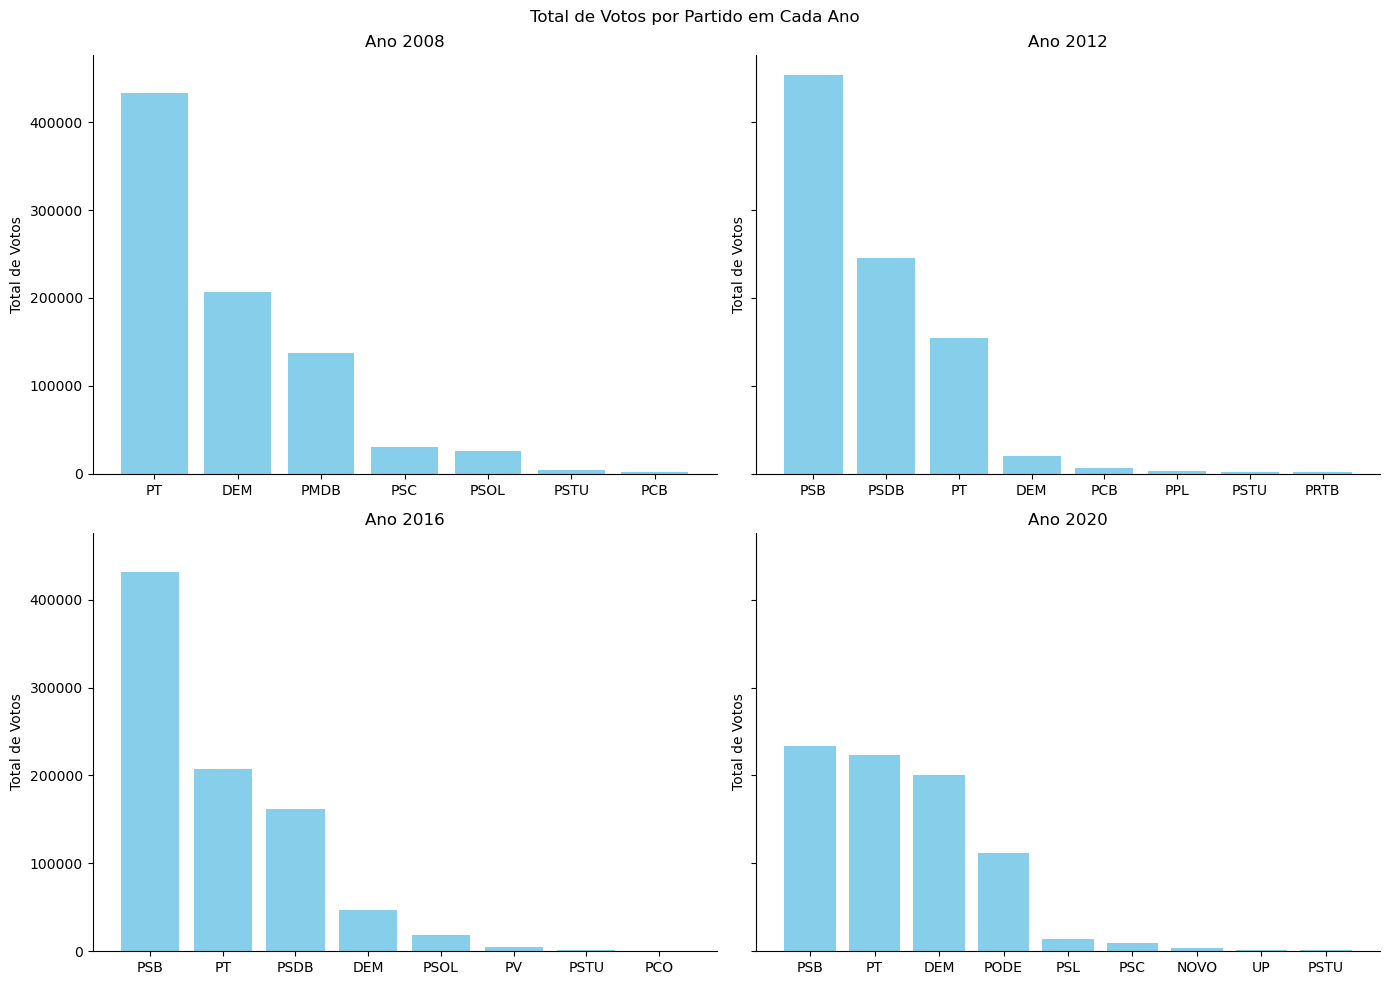

In [109]:
colors = {
    "PSB": "orange",
    "PT": "red",
    "DEM": "lightskyblue",
    "PSDB": "royalblue",
    "PODE": "olive",
    "Outros": "grey"
}

fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharey=True)
fig.suptitle('Total de Votos por Partido para Prefeito do Recife no Primmeiro Turno entre 2008 e 2020')

# Iterando sobre os anos e plotando os gráficos de barra
anos = [2008, 2012, 2016, 2020]
for i, ano in enumerate(anos):
    df_ano = df_recife_pref_t1_pd[df_recife_pref_t1_pd['ANO'] == ano]
    sg_partidos = df_ano['SG_PARTIDO']
    total_votos = df_ano['total_votos']
    
    # Configurando a posição do subplot
    ax = axs[i // 2, i % 2]
    
    # Plotando o gráfico de barra
    ax.bar(sg_partidos, total_votos, color='skyblue')
    # for partido, cor in colors.items():
    #     dados_partido = df_ano[df_ano['SG_PARTIDO'] == partido]
    #     ax.bar(dados_partido['SG_PARTIDO'], dados_partido['total_votos'], color=cor, label=partido)
    

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Adicionando título e rótulos
    ax.set_title(f'Ano {ano}')
    ax.set_ylabel('Total de Votos')

# Ajustando o layout
plt.tight_layout()

# Exibindo o gráfico
plt.show()

C:\Users\guilhermevmmpg\AppData\Local\Temp\ipykernel_8052\2938779792.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


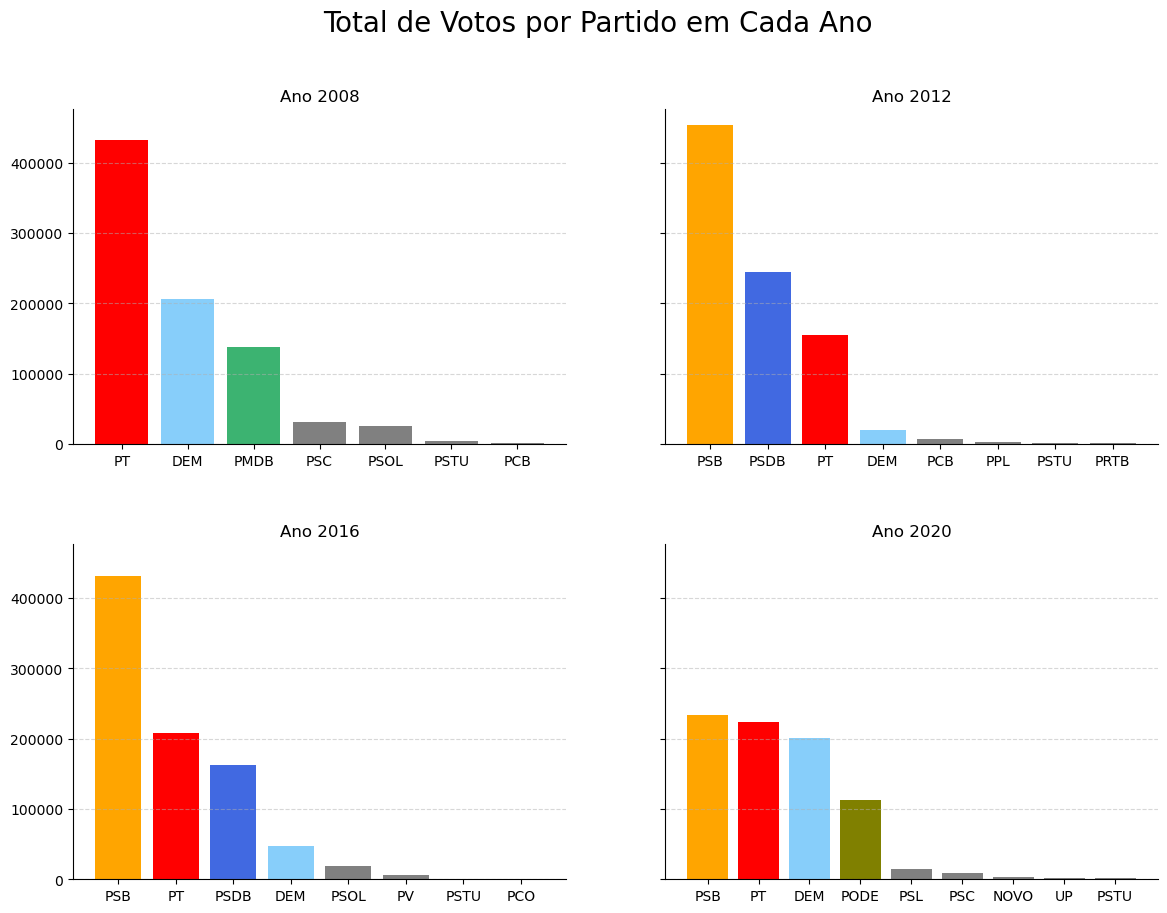

In [121]:
colors = {
    "PSB": "orange",
    "PT": "red",
    "DEM": "lightskyblue",
    "PSDB": "royalblue",
    "PODE": "olive",
    "PMDB": "mediumseagreen",
    "Outros": "grey"
}

nomes_partidos = {
    'PSB': 'PSB',
    'PT': 'PT',
    'DEM': 'DEM',
    'PSDB': 'PSDB',
    'PODE': 'PODE',
    'Outros': 'Outros'
}

# Configurações para plotagem
fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharey=True, gridspec_kw={'hspace': 0.3})
fig.suptitle('Total de Votos por Partido para Prefeito no primeiro turno entre 2008 e 2020', fontsize=20)

# Iterando sobre os anos e plotando os gráficos de barra
anos = [2008, 2012, 2016, 2020]
for i, ano in enumerate(anos):
    df_ano = df_recife_pref_t1_pd[df_recife_pref_t1_pd['ANO'] == ano]
    sg_partidos = df_ano['SG_PARTIDO']
    total_votos = df_ano['total_votos']
    
    # Verificar partidos com poucos votos
    votos_limite = 50  # Defina um limite para considerar como poucos votos
    df_ano.loc[df_ano['total_votos'] < votos_limite, 'SG_PARTIDO'] = 'Outros'
    
    # Configurando a posição do subplot
    ax = axs[i // 2, i % 2]
    
    # Plotando o gráfico de barra com cores personalizadas
    for partido in df_ano['SG_PARTIDO'].unique():
        dados_partido = df_ano[df_ano['SG_PARTIDO'] == partido]
        cor = colors.get(partido, 'gray')  # Cor genérica para partidos não mapeados
        nome_partido = nomes_partidos.get(partido, partido)  # Obtém o nome completo do partido
        ax.bar(nome_partido, dados_partido['total_votos'], color=cor, label=partido)
    
    # Adicionando título e rótulos
    ax.set_title(f'Ano {ano}')
    
    # Removendo as linhas da grade do topo e da direita
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.grid(axis='y', linestyle='--', alpha=0.5)

# Ajustando o layout
plt.tight_layout()

# Exibindo o gráfico
plt.show()